# **Chapter 9: Morphological image processing**
This notebook introduces **morphological image processing** for binary and grayscale images. We start from thresholding and basic operations (erosion, dilation, opening, closing), then combine them (hit‑or‑miss, connected components/labeling), and finally cover grayscale morphology (including morphological gradient and top‑hat) and a brief granulometry example. The image used in this notebook can be downloaded from [here](https://drive.google.com/file/d/158rtG35A5OjUMsifTMBnhNXxfwwEDdoj/view?usp=sharing). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import *
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[10,6]

In [2]:
I = io.imread('rocks.png')

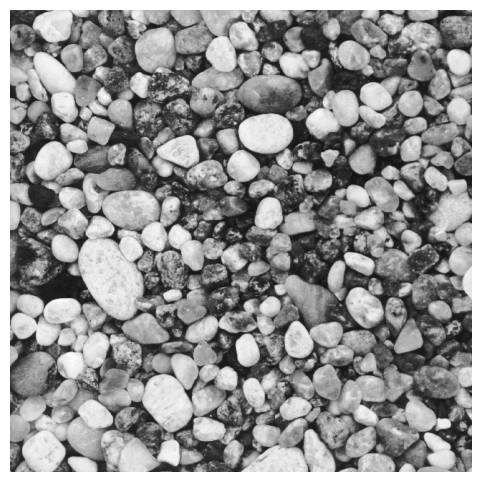

In [3]:
plt.imshow(I)
plt.axis('off');

## Basic operations of binary morphology
First we convert the input to a binary image by simple thresholding so that bright stones become foreground against a dark background. This binarization step defines the objects that morphology will operate on.

In [4]:
B = I>210

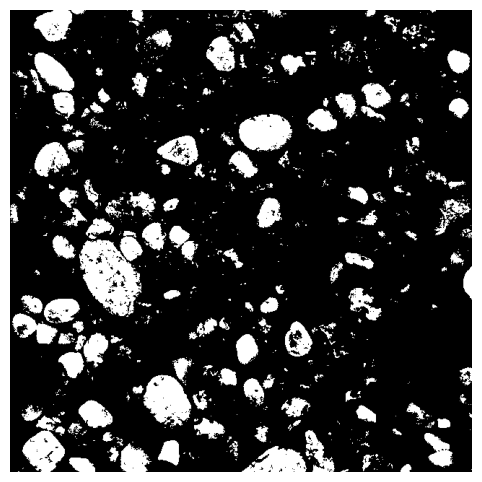

In [5]:
plt.imshow(B)
plt.axis('off');

We also choose a **disk‑shaped structuring element** of radius 2. The structuring element (SE) controls the notion of neighborhood and scale for all operations below.

In [6]:
S = disk(2)

In [7]:
print(S)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


### Erosion
**Erosion** shrinks foreground objects and removes bright specks smaller than the SE. Applied to our binary image, it thins boundaries and eliminates tiny particles that cannot contain the SE.

In [8]:
E = binary_erosion(B,S)

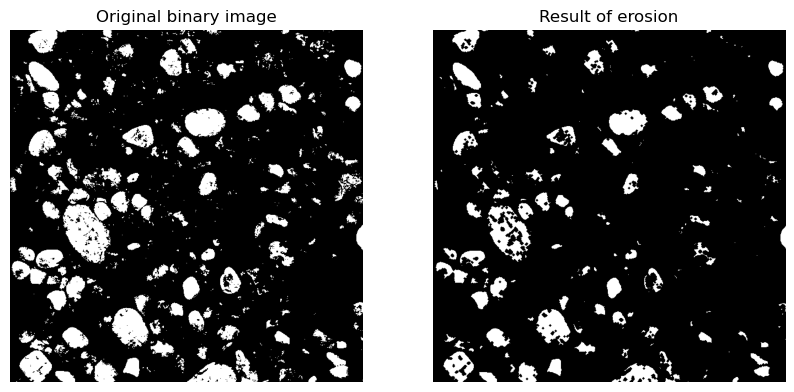

In [9]:
plt.subplot(121)
plt.imshow(B)
plt.title('Original binary image')
plt.axis('off')
plt.subplot(122)
plt.imshow(E)
plt.title('Result of erosion')
plt.axis('off');

### Dilation
**Dilation** is the dual operation that expands objects and fills small holes or gaps. On our example it grows the stones slightly and bridges very narrow breaks in the foreground.

In [10]:
D = binary_dilation(B,S)

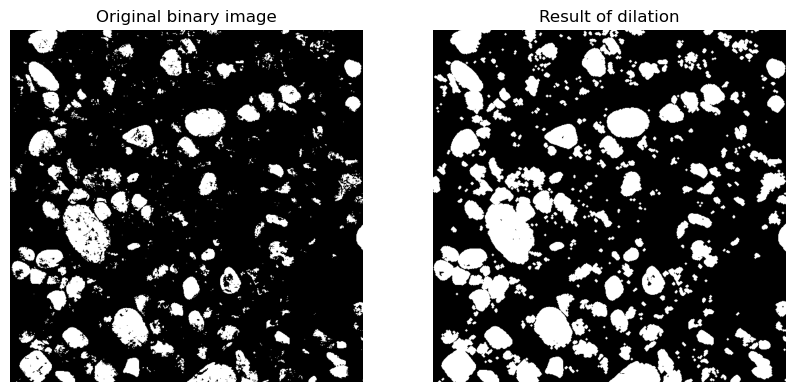

In [11]:
plt.subplot(121)
plt.imshow(B)
plt.title('Original binary image')
plt.axis('off')
plt.subplot(122)
plt.imshow(D)
plt.title('Result of dilation')
plt.axis('off');

### Opening
**Opening** (erosion followed by dilation with the same SE) smooths object contours and removes small isolated objects while largely preserving the size of larger ones. It is useful for cleaning pepper noise from the binary mask.

In [12]:
O = binary_opening(B,S)

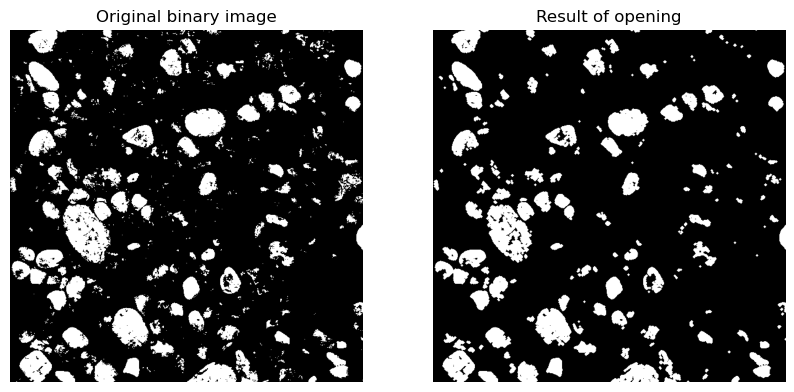

In [13]:
plt.subplot(121)
plt.imshow(B)
plt.title('Original binary image')
plt.axis('off')
plt.subplot(122)
plt.imshow(O)
plt.title('Result of opening')
plt.axis('off');

### Closing
**Closing** (dilation followed by erosion) smooths contours in the opposite sense: it bridges narrow breaks, fills small holes, and connects close objects. The result shows thicker, more connected stones with small gaps closed.

In [14]:
C = binary_closing(O,S)

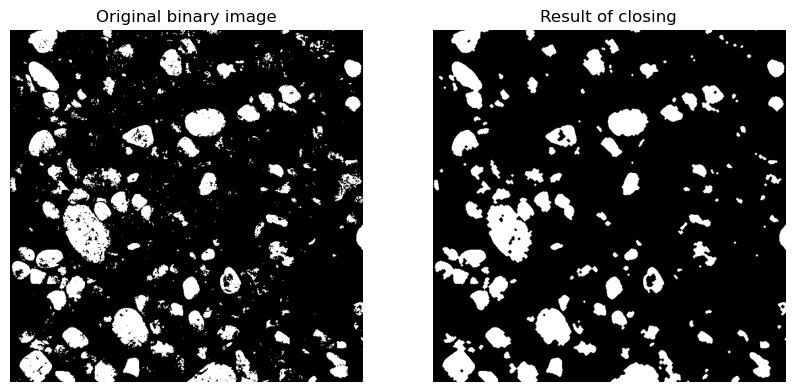

In [15]:
plt.subplot(121)
plt.imshow(B)
plt.title('Original binary image')
plt.axis('off')
plt.subplot(122)
plt.imshow(C)
plt.title('Result of closing')
plt.axis('off');

## Combinations of the basic operations
Beyond the primitives, we can combine morphology for detection tasks. Here we use a **hit‑or‑miss** construction with two SEs to locate stones of a certain thickness: one SE must fit inside the object while another must fit in the background around it; the highlighted pixels mark detected locations.

In [16]:
S1 = disk(5)
S2 = disk(20)

In [17]:
H = np.bitwise_and(binary_erosion(C,S1),binary_erosion(1-C,1-S2))

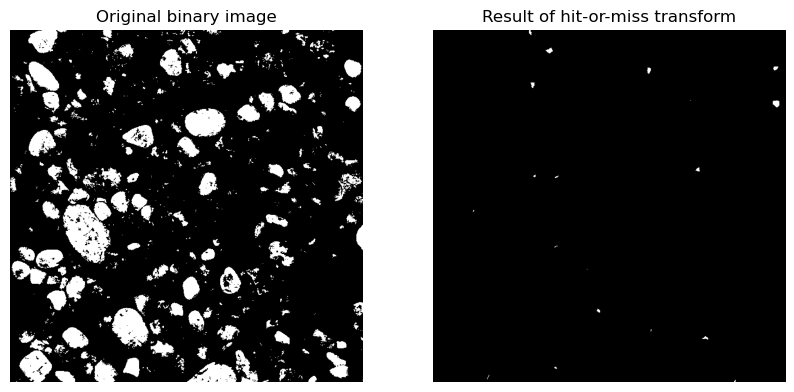

In [18]:
plt.subplot(121)
plt.imshow(B)
plt.title('Original binary image')
plt.axis('off')
plt.subplot(122)
plt.imshow(H)
plt.title('Result of hit-or-miss transform')
plt.axis('off');

### Connected component extraction
We iteratively dilate the detected seeds while intersecting with the mask to grow full components of interest. This selects only the stones that satisfy the criteria set above.

In [19]:
for i in range(60):
    H = np.bitwise_and(binary_dilation(H,disk(1)),C)

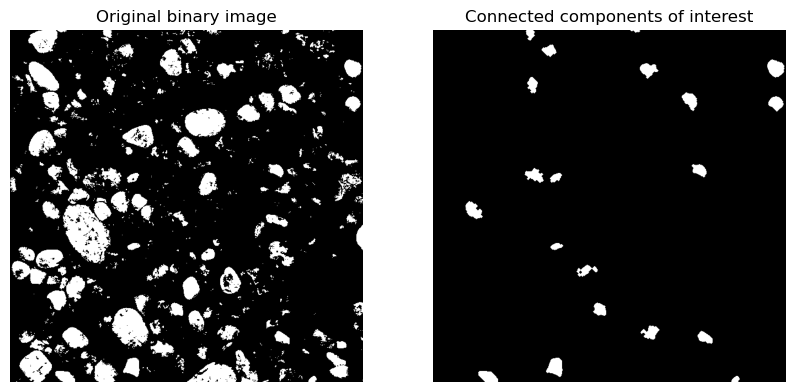

In [20]:
plt.subplot(121)
plt.imshow(B)
plt.title('Original binary image')
plt.axis('off')
plt.subplot(122)
plt.imshow(H)
plt.title('Connected components of interest')
plt.axis('off');

Next, we perform connected component labeling that gives a unique label to each isolated component (object) in the binary image. The labeled image is illustrated using pseudocolor representation.

In [21]:
L = label(H)

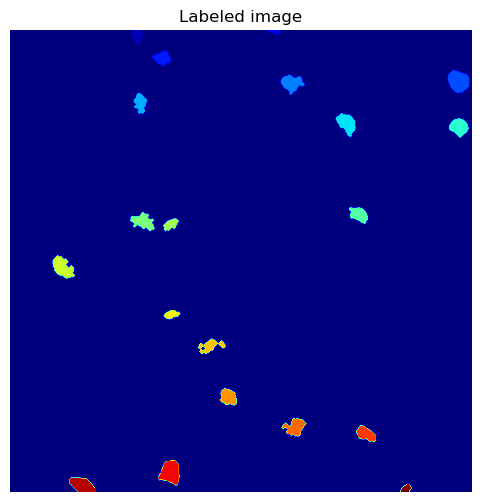

In [22]:
plt.imshow(L,'jet')
plt.title('Labeled image')
plt.axis('off');

Below we visualize the component with label $10$. This isolates one stone for inspection or measurement.

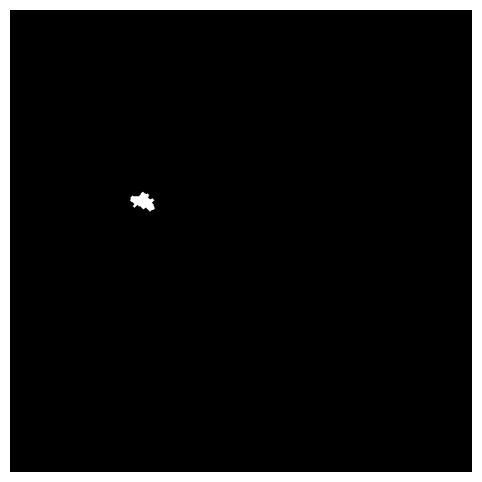

In [23]:
plt.imshow(L==10)
plt.axis('off');

## Grayscale morphology
In **grayscale morphology**, the same operations are defined with respect to intensity. We use only a flat SE in the following examples to keep the interpretation straightforward.

In [24]:
S = disk(3)

### Erosion
Grayscale **erosion** replaces each pixel by the local minimum under the SE, which darkens bright peaks and contracts bright regions. On average, the overall brightness decreases slightly.

In [25]:
E = erosion(I,S)

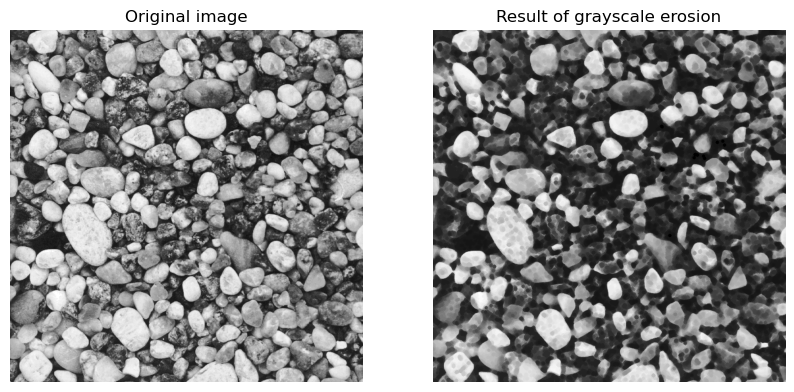

In [26]:
plt.subplot(121)
plt.imshow(I)
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(E)
plt.title('Result of grayscale erosion')
plt.axis('off');

### Dilation
Grayscale **dilation** replaces each pixel by the local maximum under the SE, expanding bright regions and filling small dark dips. The average brightness correspondingly increases.

In [27]:
D = dilation(I,S)

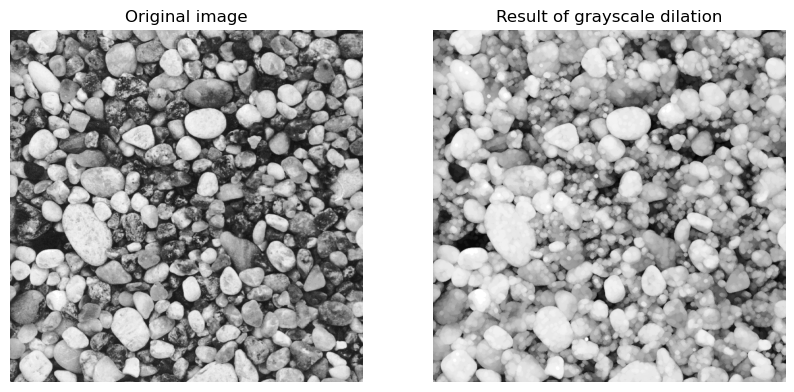

In [28]:
plt.subplot(121)
plt.imshow(I)
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(D)
plt.title('Result of grayscale dilation')
plt.axis('off');

### Opening
Grayscale **opening** is erosion followed by dilation; it removes small bright structures while preserving the broader background. Compare the result to see how fine highlights are suppressed.

In [29]:
O = opening(I,S)

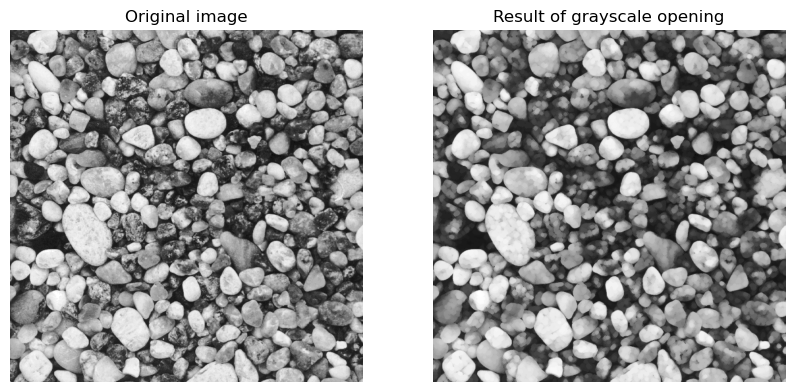

In [30]:
plt.subplot(121)
plt.imshow(I)
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(O)
plt.title('Result of grayscale opening')
plt.axis('off');

### Closing
Grayscale **closing** is dilation followed by erosion; it fills small dark gaps and smooths valleys while keeping larger structures intact. Again, observe how the appearance changes.

In [31]:
C = closing(I,S)

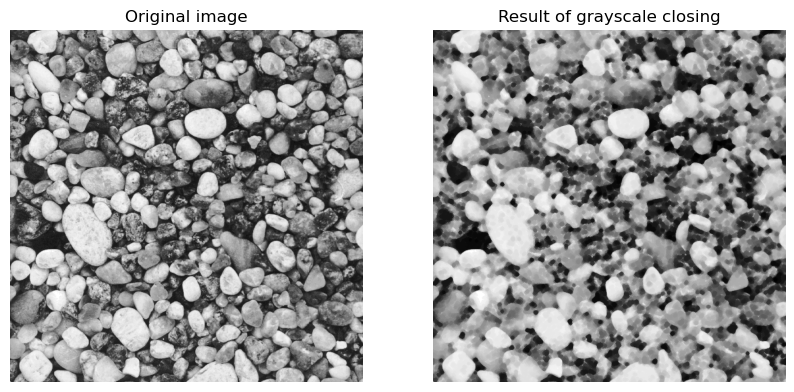

In [32]:
plt.subplot(121)
plt.imshow(I)
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(C)
plt.title('Result of grayscale closing')
plt.axis('off');

### Morphological gradient
The **morphological gradient** (dilation minus erosion) emphasizes object edges by measuring local contrast across the SE. It acts as a simple, edge‑enhancing operator in the grayscale setting.

In [33]:
G = D - E

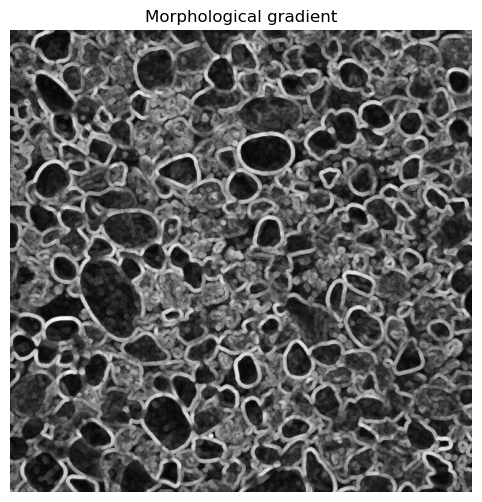

In [34]:
plt.imshow(G)
plt.title('Morphological gradient')
plt.axis('off');

### Top-hat transform
The **top‑hat transform** compensates for slowly varying background: we estimate background via a large‑scale opening and subtract it from the original. For visualization we rescale and offset the result to the display range.

In [35]:
O = opening(I,disk(40))

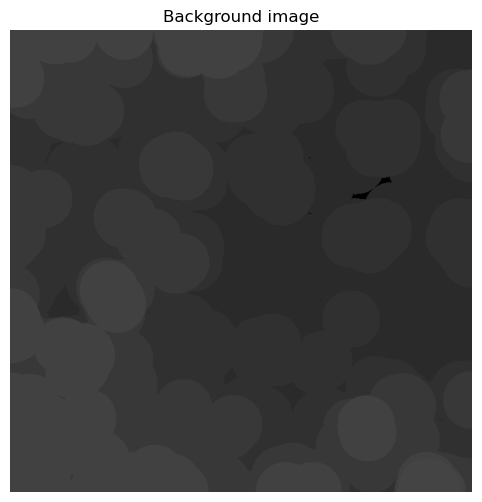

In [36]:
plt.imshow(O*2,vmin=I.min(),vmax=I.max())
plt.title('Background image')
plt.axis('off');

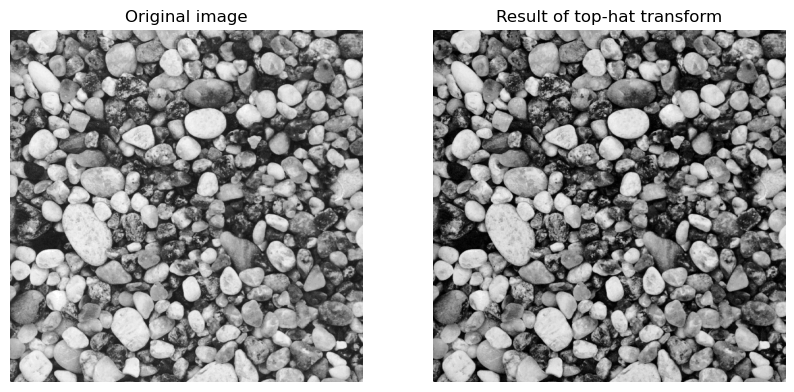

In [37]:
plt.subplot(121)
plt.imshow(I)
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(I-O)
plt.title('Result of top-hat transform')
plt.axis('off');

## Granulometry
**Granulometry** estimates the size distribution of objects by applying openings with increasing SE sizes and counting remaining foreground pixels. The result is approximate—in this example we only get a rough sense of characteristic object scales.

In [38]:
O1 = opening(I,disk(10))
O2 = opening(I,disk(15))

In [39]:
F = abs(O1-O2)>20

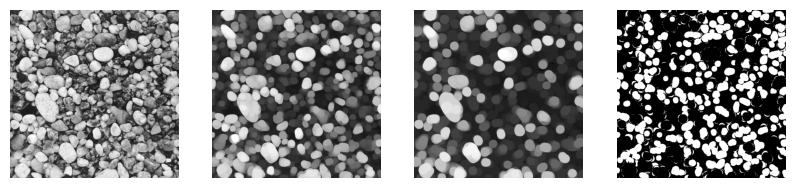

In [40]:
plt.subplot(141)
plt.imshow(I)
plt.axis('off')
plt.subplot(142)
plt.imshow(O1)
plt.axis('off')
plt.subplot(143)
plt.imshow(O2)
plt.axis('off')
plt.subplot(144)
plt.imshow(F)
plt.axis('off');

In [41]:
print(F.sum()/F.size*100, "% of the stones have the radius between 10 and 15 pixels.")

35.29443359375 % of the stones have the radius between 10 and 15 pixels.
